<a href="https://colab.research.google.com/github/nonyeezeh/Research-Project-Code/blob/main/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

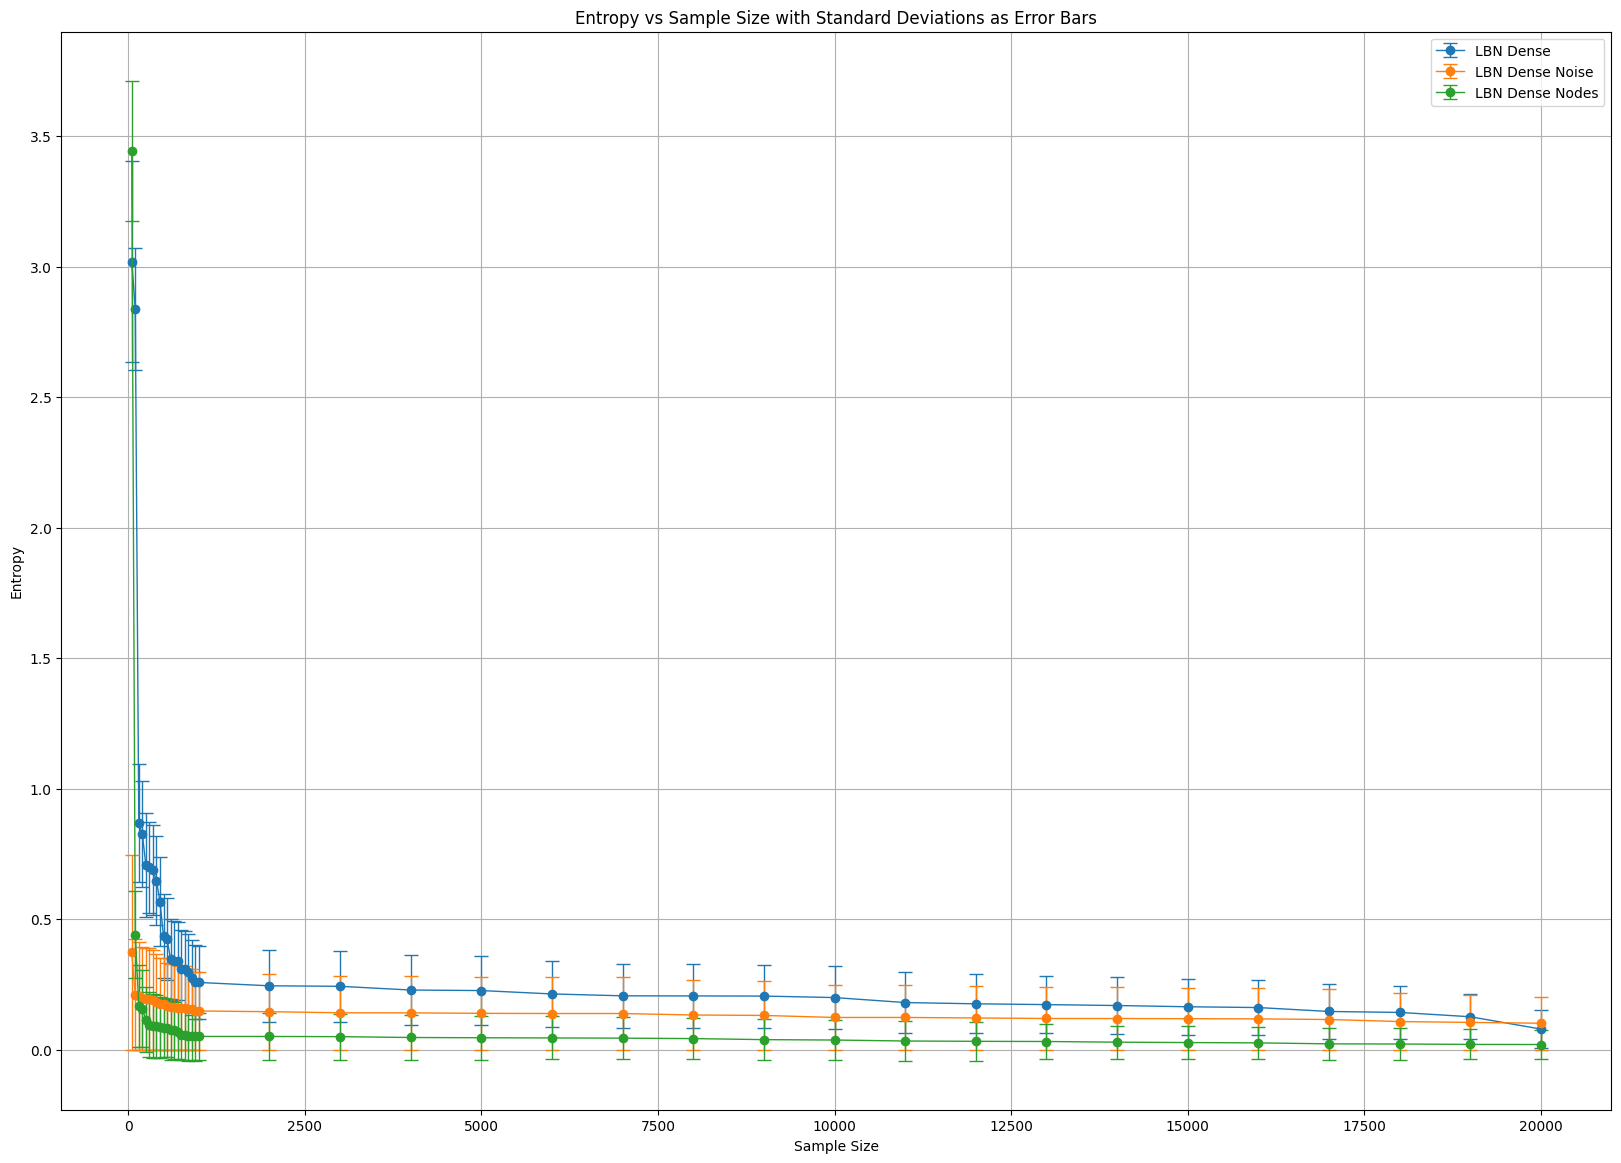

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample sizes to match the data in your CSVs
sample_sizes = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,
                         2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000,
                         17000, 18000, 19000, 20000])

# Read in the average K-L divergence data from CSV
avg_data_df = pd.read_csv('LBN AVGs.csv')

# Read in the standard deviation data from CSV
std_data_df = pd.read_csv('LBN STDs.csv')

# Prepare entropy data dictionary for plotting
entropy_data = {
    "LBN Dense": avg_data_df["LBN Dense"].tolist(),
    "LBN Dense Noise": avg_data_df["LBN Dense Noise"].tolist(),
    "LBN Dense Nodes": avg_data_df["LBN Dense Nodes"].tolist()
}

# Prepare standard deviation data dictionary for plotting
std_dev_data = {
    "LBN Dense": std_data_df["LBN Dense"].tolist(),
    "LBN Dense Noise": std_data_df["LBN Dense Noise"].tolist(),
    "LBN Dense Nodes": std_data_df["LBN Dense Nodes"].tolist()
}

# Plotting
plt.figure(figsize=(20, 14))  # Adjusting the width (20) and height (14) for landscape

for model, entropies in entropy_data.items():
    std_devs = std_dev_data[model]
    plt.errorbar(sample_sizes, entropies, yerr=std_devs, label=model, capsize=5, marker='o', linestyle='-', linewidth=1)

plt.xlabel('Sample Size')
plt.ylabel('Entropy')
plt.title('Entropy vs Sample Size with Standard Deviations as Error Bars')
plt.legend()
plt.grid(True)

# Save the plot as a PDF in landscape
plt.savefig('entropy_vs_sample_size.pdf', format='pdf', bbox_inches='tight', orientation='landscape')

# Save the plot as a PNG in landscape
plt.savefig('entropy_vs_sample_size.png', format='png', bbox_inches='tight', orientation='landscape')

# Show the plot
plt.show()